In [6]:
%matplotlib inline

In [4]:
from sklearn.datasets import load_iris

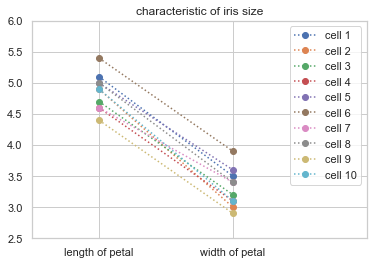

In [5]:
from sklearn.datasets import load_iris
iris = load_iris()
N = 10  # 앞의 10송이만 선택
X = iris.data[:N, :2]  # 꽃받침 길이와 꽃받침 폭만 선택

plt.plot(X.T, 'o:')
plt.xticks(range(4), ["length of petal", "width of petal"])
plt.xlim(-0.5, 2)
plt.ylim(2.5, 6)
plt.title("characteristic of iris size")
plt.legend(["cell {}".format(i + 1) for i in range(N)])
plt.show()

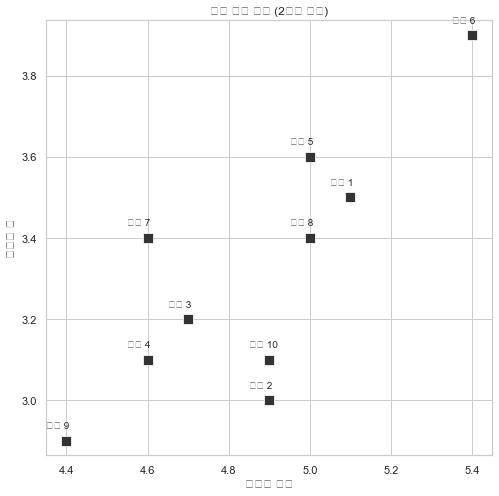

In [11]:
plt.figure(figsize=(8, 8))
ax = sns.scatterplot(0, 1, data=pd.DataFrame(X), s=100, color=".2", marker="s")
for i in range(N):
    ax.text(X[i, 0] - 0.05, X[i, 1] + 0.03, "표본 {}".format(i + 1))
plt.xlabel("꽃받침 길이")
plt.ylabel("꽃받침 폭")
plt.title("붓꽃 크기 특성 (2차원 표시)")
plt.axis("equal")
plt.show()

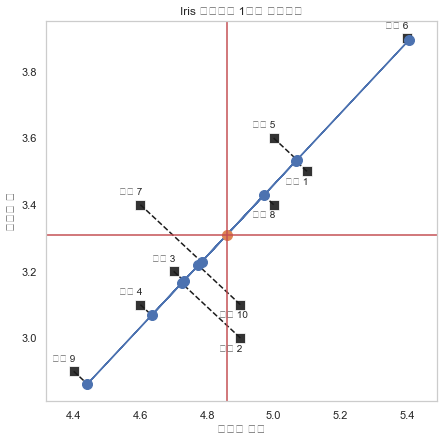

In [30]:
from sklearn.decomposition import PCA

pca1 = PCA(n_components = 1) # 1차원으로 차원축소하는 역할
X_low = pca1.fit_transform(X) #X_low는 1차원 근사 데이터의 집합
X2 = pcal.inverse_transform(X_low) #다시 2차원 복귀한 근사 데이터 집합

plt.figure(figsize=(7, 7))
#sns는 seaborn패키지 의미
ax = sns.scatterplot(0, 1, data=pd.DataFrame(X), s=100, color=".2", marker="s")
for i in range(N):
    d = 0.03 if X[i, 1] > X2[i, 1] else -0.04
    ax.text(X[i, 0] - 0.065, X[i, 1] + d, "표본 {}".format(i + 1))
    plt.plot([X[i, 0], X2[i, 0]], [X[i, 1], X2[i, 1]], "k--")
plt.plot(X2[:, 0], X2[:, 1], "o-", markersize=10)
plt.plot(X[:, 0].mean(), X[:, 1].mean(), markersize=10, marker="o")
plt.axvline(X[:, 0].mean(), c='r')
plt.axhline(X[:, 1].mean(), c='r')
plt.grid(False)
plt.xlabel("꽃받침 길이")
plt.ylabel("꽃받침 폭")
plt.title("Iris 데이터의 1차원 차원축소")
plt.axis("equal")
plt.show()

In [32]:
pca1.mean_ #average of data

array([4.86, 3.31])

In [33]:
pca1.components_

array([[0.68305029, 0.73037134]])

In [34]:
X0 = X - X.mean(axis = 0)
U, S, VT = np.linalg.svd(X0)
VT

array([[-0.68305029, -0.73037134],
       [-0.73037134,  0.68305029]])

In [35]:
VT[:,0]

array([-0.68305029, -0.73037134])

In [43]:
XCOV = X0.T @ X0
W, V = np.linalg.eig(XCOV)

In [44]:
W

array([0.17107711, 1.44192289])

In [45]:
V

array([[-0.73037134, -0.68305029],
       [ 0.68305029, -0.73037134]])

In [50]:
V[:,np.argmax(W)]

array([-0.68305029, -0.73037134])

In [51]:
X[7,:] #(8번째 꽃받침 길이, 꽃받침 폭)

array([5. , 3.4])

In [52]:
X_low[7] #꽃의 크기 #1차원 근사

array([0.16136046])

In [53]:
pca1.components_@ (X[7, :] - pca1.mean_)

array([0.16136046])

In [55]:
X2[7,:]

array([4.97021731, 3.42785306])

In [60]:
#연습 문제 3.5.1
from sklearn.datasets import load_iris
iris = load_iris()
N = 50  # 앞의 50송이만 선택
X = iris.data[:N, :2]  # 꽃받침 길이,폭만 선택

In [77]:
from sklearn.decomposition import PCA
pca1 = PCA(n_components = 1) # 1차원으로 차원축소하는 역할
X_low = pca1.fit_transform(X) #X_low는 1차원 근사 데이터의 집합
X2 = pca1.inverse_transform(X_low) #다시 2차원 복귀한 근사 데이터 집합

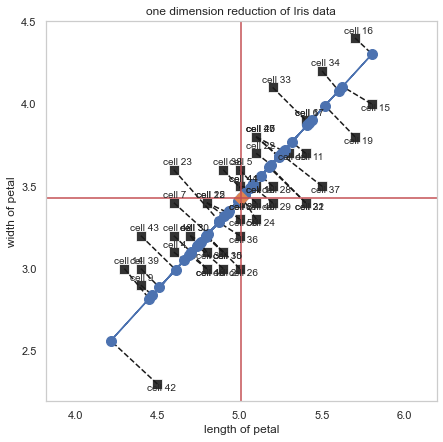

In [78]:
#꽃의 크기는 꽃받침 길이와 꽃받침 폭의 어떤 선형조합??
plt.figure(figsize=(7, 7))
ax = sns.scatterplot(0, 1, data=pd.DataFrame(X), s=100, color=".2", marker="s")
for i in range(N):
    d = 0.03 if X[i, 1] > X2[i, 1] else -0.04
    ax.text(X[i, 0] - 0.065, X[i, 1] + d, "cell {}".format(i + 1))
    plt.plot([X[i, 0], X2[i, 0]], [X[i, 1], X2[i, 1]], "k--")
plt.plot(X2[:, 0], X2[:, 1], "o-", markersize=10)
plt.plot(X[:, 0].mean(), X[:, 1].mean(), markersize=10, marker="D")
plt.axvline(X[:, 0].mean(), c='r')
plt.axhline(X[:, 1].mean(), c='r')
plt.grid(False)
plt.xlabel("length of petal")
plt.ylabel("width of petal")
plt.title("one dimension reduction of Iris data")
plt.axis("equal")
plt.show()

In [74]:
from sklearn.datasets import load_iris
iris = load_iris()
N = 50  # 앞의 50송이만 선택
X = iris.data[:N, :4]  # 꽃받침 길이,폭, 꽃잎 길이,폭만 선택
from sklearn.decomposition import PCA
pca1 = PCA(n_components = 1) # 1차원으로 차원축소하는 역할
X_low = pca1.fit_transform(X) #X_low는 1차원 근사 데이터의 집합
X2 = pca1.inverse_transform(X_low) #다시 2차원 복귀한 근사 데이터 집합

In [71]:
pca1.components_

array([[0.6690784 , 0.73414783, 0.0965439 , 0.06356359]])

In [2]:
from sklearn.datasets import fetch_olivetti_faces

faces_all = fetch_olivetti_faces()
K = 20 #select only 20th figure
faces = faces_all.images[faces_all.target == K]

N = 2
M = 5
fig = plt.figure(figsize = (10, 5))
plt.subplots_adjust(top = 1, bottom = 0, hspace = 0, wspace = 0.05)
for i in range(N):
    for j in range(M):
        k = i * M + j
        ax = fig.add_subplot(N, M, k+1)
        ax.imshow(faces[k], cmap = plt.cm.bone)
        ax.grid(False)
        ax.xaxis.set_ticks([])
        ax.yaxis.set_ticks([])
plt.suptitle("olivetti's face picture")
plt.tight_layout()
plt.show()

In [4]:
#주성분 2개, 2차원으로 PCA 분석
from sklearn.decomposition import PCA
pca3 = PCA(n_components = 2)
X3 = faces_all.data[faces_all.target == K]
W3 = pca3.fit_transform(X3)
X32 = pca3.inverse_transform(W3)

In [5]:
#주성분 분석으로 근사화한 이미지 표시
N = 2
M = 5
fig = plt.figure(figsize = (10,5))
plt.subplots_adjust(top = 1, bottom = 0, hspace = 0, wspace = 0.05)
for i in range(N):
    for j in range(M):
        k = i * M + j
        ax = fig.add_subplot(N,M,k+1)
        ax.imshow(X32[k].reshape(64,64), cmap = plt.cm.bone)
        ax.grid(False)
        ax.xaxis.set_ticks([])
        ax.yaxis.set_ticks([])
plt.suptitle("face picture by PCA")
plt.tight_layout()
plt.show()

In [116]:
#이 얼굴은 평균값과 2개의 주성분 얼굴의 각기 다른 선형조합

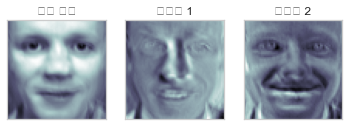

In [117]:
face_mean = pca3.mean_.reshape(64, 64)
face_p1 = pca3.components_[0].reshape(64, 64)
face_p2 = pca3.components_[1].reshape(64, 64)

plt.subplot(131)
plt.imshow(face_mean, cmap=plt.cm.bone)
plt.grid(False)
plt.xticks([])
plt.yticks([])
plt.title("평균 얼굴")
plt.subplot(132)
plt.imshow(face_p1, cmap=plt.cm.bone)
plt.grid(False)
plt.xticks([])
plt.yticks([])
plt.title("주성분 1")
plt.subplot(133)
plt.imshow(face_p2, cmap=plt.cm.bone)
plt.grid(False)
plt.xticks([])
plt.yticks([])
plt.title("주성분 2")
plt.show()

In [118]:
#이 사진만으로는 주성분 얼굴의 의미를 알기 힘듬
#따라서 우선 평균얼굴에 첫 번째 주성분 더하는 것을 보자!

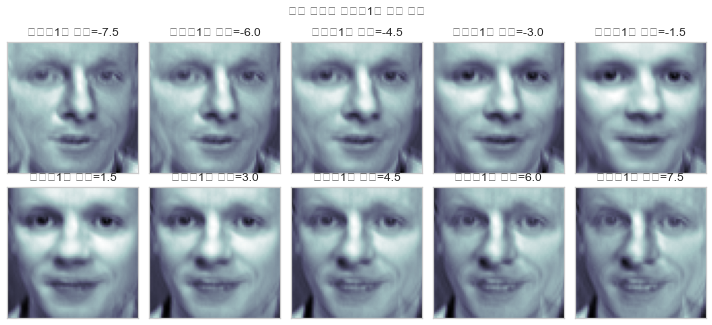

In [120]:
N = 2
M = 5
fig = plt.figure(figsize=(10, 5))
plt.subplots_adjust(top=1, bottom=0, hspace=0, wspace=0.05)
for i in range(N):
    for j in range(M):
        k = i * M + j
        ax = fig.add_subplot(N, M, k+1)
        w = 1.5 * (k - 5) if k < 5 else 1.5 * (k - 4) #주성분1의 비중
        ax.imshow(face_mean + w * face_p1, cmap=plt.cm.bone)
        ax.grid(False)
        ax.xaxis.set_ticks([])
        ax.yaxis.set_ticks([])
        plt.title("주성분1의 비중={}".format(w))
plt.suptitle("평균 얼굴에 주성분1을 더한 사진")
plt.tight_layout()
plt.show()

In [121]:
#첫번째 주성분의 의미 : 왼쪽, 오른쪽에서 바라본 얼굴 이미지

In [122]:
#두번째 주성분의 의미 찾아보기

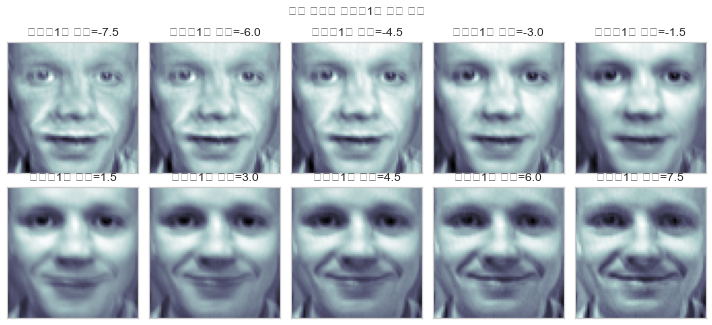

In [123]:
N = 2
M = 5
fig = plt.figure(figsize=(10, 5))
plt.subplots_adjust(top=1, bottom=0, hspace=0, wspace=0.05)
for i in range(N):
    for j in range(M):
        k = i * M + j
        ax = fig.add_subplot(N, M, k+1)
        w = 1.5 * (k - 5) if k < 5 else 1.5 * (k - 4) #주성분1의 비중
        ax.imshow(face_mean + w * face_p2, cmap=plt.cm.bone)
        ax.grid(False)
        ax.xaxis.set_ticks([])
        ax.yaxis.set_ticks([])
        plt.title("주성분1의 비중={}".format(w))
plt.suptitle("평균 얼굴에 주성분1을 더한 사진")
plt.tight_layout()
plt.show()

In [124]:
#두 번째 주성분의 의미 : 미소 여부

In [127]:
#연습 문제 3.5.2 : 다른 사람 얼굴에서 2가지 주성분 택해 의미알아보기

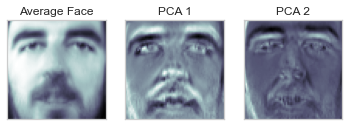

In [8]:
faces_all = fetch_olivetti_faces()
K = 10 #select only 20th figure
faces = faces_all.images[faces_all.target == K]

pca3 = PCA(n_components = 2)
X3 = faces_all.data[faces_all.target == K]
W3 = pca3.fit_transform(X3)
X32 = pca3.inverse_transform(W3)

face_mean = pca3.mean_.reshape(64, 64)
face_p1 = pca3.components_[0].reshape(64, 64)
face_p2 = pca3.components_[1].reshape(64, 64)

plt.subplot(131)
plt.imshow(face_mean, cmap=plt.cm.bone)
plt.grid(False)
plt.xticks([])
plt.yticks([])
plt.title("Average Face")
plt.subplot(132)
plt.imshow(face_p1, cmap=plt.cm.bone)
plt.grid(False)
plt.xticks([])
plt.yticks([])
plt.title("PCA 1")
plt.subplot(133)
plt.imshow(face_p2, cmap=plt.cm.bone)
plt.grid(False)
plt.xticks([])
plt.yticks([])
plt.title("PCA 2")
plt.show()

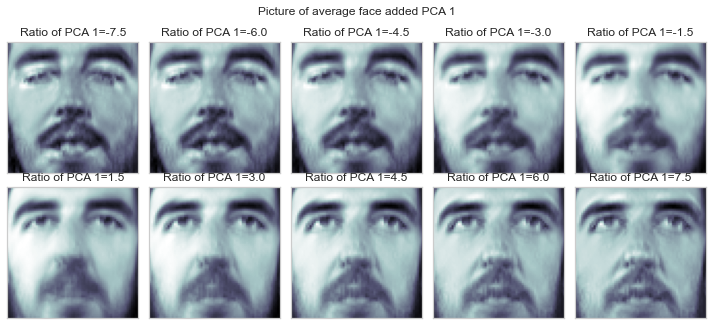

In [11]:
N = 2
M = 5
fig = plt.figure(figsize=(10, 5))
plt.subplots_adjust(top=1, bottom=0, hspace=0, wspace=0.05)
for i in range(N):
    for j in range(M):
        k = i * M + j
        ax = fig.add_subplot(N, M, k+1)
        w = 1.5 * (k - 5) if k < 5 else 1.5 * (k - 4) #주성분1의 비중
        ax.imshow(face_mean + w * face_p1, cmap=plt.cm.bone)
        ax.grid(False)
        ax.xaxis.set_ticks([])
        ax.yaxis.set_ticks([])
        plt.title("Ratio of PCA 1={}".format(w))
plt.suptitle("Picture of average face added PCA 1")
plt.tight_layout()
plt.show()

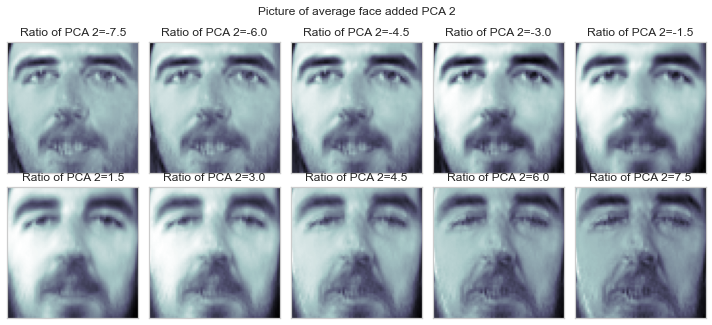

In [13]:
N = 2
M = 5
fig = plt.figure(figsize=(10, 5))
plt.subplots_adjust(top=1, bottom=0, hspace=0, wspace=0.05)
for i in range(N):
    for j in range(M):
        k = i * M + j
        ax = fig.add_subplot(N, M, k+1)
        w = 1.5 * (k - 5) if k < 5 else 1.5 * (k - 4) #주성분1의 비중
        ax.imshow(face_mean + w * face_p2, cmap=plt.cm.bone)
        ax.grid(False)
        ax.xaxis.set_ticks([])
        ax.yaxis.set_ticks([])
        plt.title("Ratio of PCA 2={}".format(w))
plt.suptitle("Picture of average face added PCA 2")
plt.tight_layout()
plt.show()

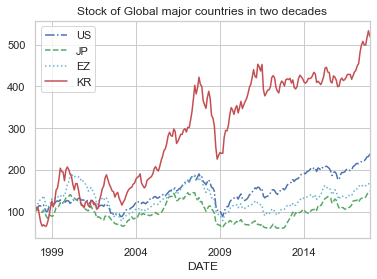

In [137]:
#주식 가격의 PCA
#미국,일본,유럽,한국의 과거 20년간 주가 살펴보기
pd.core.common.is_list_like = pd.api.types.is_list_like
import pandas_datareader.data as web
import datetime

symbols = [
    "SPASTT01USM661N", # US : United States
    "SPASTT01JPM661N", # JP : Japan
    "SPASTT01EZM661N", # EZ : Europe
    "SPASTT01KRM661N", # KR : Korea
]

data = pd.DataFrame()
for sym in symbols:
    data[sym] = web.DataReader(sym, data_source = 'fred',
                              start = datetime.datetime(1998, 1, 1),
                              end = datetime.datetime(2017, 12, 31))[sym]
data.columns = ["US", "JP", "EZ", "KR"]
data = data / data.iloc[0] * 100
    
styles = ["b-.", "g--", "c:", "r-"]
data.plot(style = styles)
plt.title("Stock of Global major countries in two decades")
plt.show()

In [138]:
#연간 주식수익률 데이터
#pct_change : 퍼센트 변화율 계산
#resample : 시간간격 재조정
df = ((data.pct_change() + 1).resample("A").prod() - 1).T * 100
print(df.iloc[:,:5])

DATE  1998-12-31  1999-12-31  2000-12-31  2001-12-31  2002-12-31
US     14.249290   10.800392    1.094171   -9.638213  -17.680773
JP     -8.567915   47.802619  -18.365577  -23.827406  -16.923968
EZ     21.308040   36.872314    1.375330  -21.857080  -30.647772
KR     10.411582   87.623876  -46.975114   27.644005    4.448180


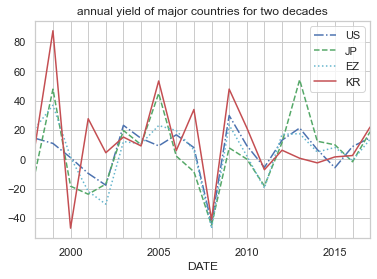

In [141]:
df.T.plot(style = styles)
plt.title("annual yield of major countries for two decades")
plt.xticks(df.columns)
plt.show()

In [142]:
pca2 = PCA(n_components = 1)
w = pca2.fit_transform(df)

In [148]:
#평균벡터
m = pca2.mean_

In [147]:
#주성분1번째
p1 = pca2.components_[0]

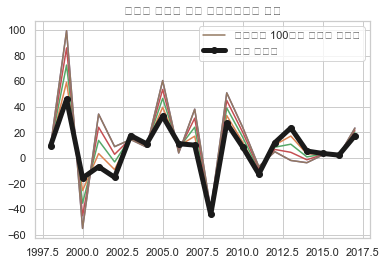

In [149]:
xrange = np.linspace(1998, 2017, 20, dtype=int)
for i in np.linspace(0, 100, 5):
    plt.plot(xrange, pca2.mean_ + p1 * i)
plt.plot(xrange, pca2.mean_ + p1 * 100, label="주성분의 100배를 추가한 수익률")
plt.plot(xrange, pca2.mean_, "ko-", lw=5, label="평균 수익률")
plt.title("주성분 크기에 의한 주가수익률의 변화")
plt.legend()
plt.show()

In [150]:
#각 나라의 주성분 비중 구하기 in order to get mean of principal component
df_w = pd.DataFrame(w)
df_w.index = df.index
df_w.columns = ["importance of principal components"]
print(df_w)

    importance of principal components
US                          -33.413784
JP                          -20.943197
EZ                          -26.917702
KR                           81.274683


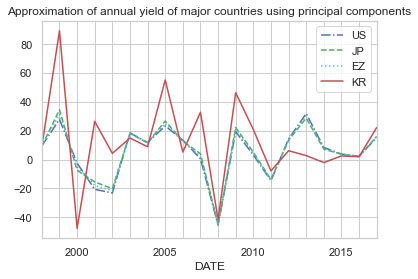

In [152]:
#한국의 주성분 비중 80넘고 나머지는 음수
df_i = pd.DataFrame(pca2.inverse_transform(w))
df_i.index = df.index
df_i.columns = df.columns
df_i.iloc[:,-10:]
df_i.T.plot(style = styles)
plt.title("Approximation of annual yield of major countries using principal components")
plt.xticks(df.columns)
plt.show()

In [ ]:
#우리가 구한 주성분은 "미국,일본,유럽" 데이터로부터 "한국"이라는 데이터로 변화시키는 요인
#중진국 요인이라 부를 수 있는 성분